Index(['TEAM_ID', 'Home_Away', 'MATCHUP_ID', 'FG_PCT_DIFF', 'FG3_PCT_DIFF',
       'FT_PCT_DIFF', 'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF',
       'PER%_DIFF', 'YEAR', 'MONTH', 'DAY', 'WL_encoded', 'DRtg_Oliver_DIFF'],
      dtype='object')
         TEAM_ID Home_Away MATCHUP_ID  FG_PCT_DIFF  FG3_PCT_DIFF  FT_PCT_DIFF  \
3275  1610612737      Home     ATLNJN    -0.049494     -0.667000     0.089333   
3274  1610612737      Away     ATLPHL    -0.002928      0.083333     0.039250   
3273  1610612737      Home     ATLMIL    -0.083765      0.250000     0.012556   
3272  1610612737      Home     ATLPHX    -0.184175     -0.429000     0.152652   
3271  1610612737      Home     ATLWAS    -0.037333     -0.111000    -0.150000   

      TS%_DIFF  eFG%_DIFF  AST%_DIFF  ORtg_DIFF  PER%_DIFF  YEAR  MONTH  DAY  \
3275 -0.018763  -0.060841  21.537922 -11.431767 -29.962481  1986     11    1   
3274  0.015290   0.003525  35.491517  -3.680542   0.272718  1986     11    2   
3273 -0.039829  -0.0660

C:\Users\ghadf\AppData\Local\Temp\ipykernel_12864\1878881557.py:67: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = preprocessor_data.corr()


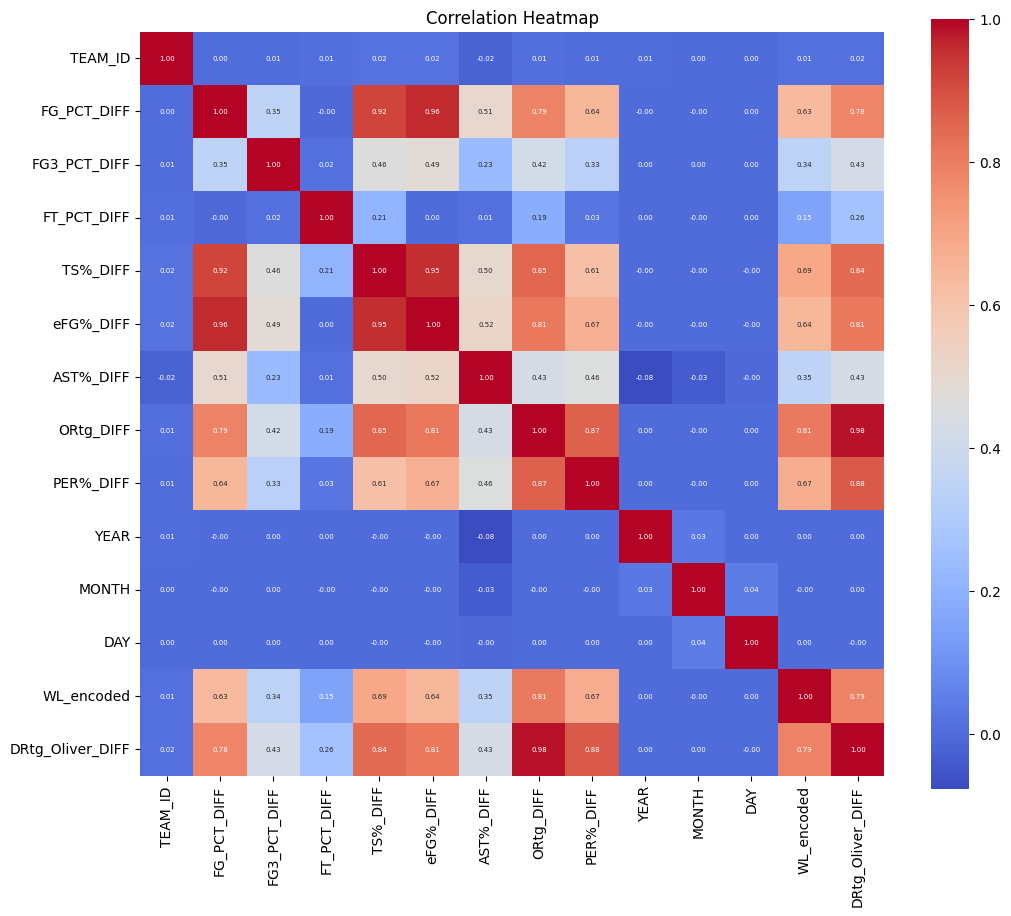

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from torch.optim.lr_scheduler import StepLR
from torch.utils.tensorboard import SummaryWriter



# Load the data
data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\data\nba\model_preprocessing_store\nba_threeptera_prepreprocess_data.csv')

# Sort the data by TEAM_ID and GAME_DATE
data.sort_values(by=['TEAM_ID', 'GAME_DATE'], inplace=True)

# Extract team_ids for sequence creation and train-test split
team_ids = data['TEAM_ID'].values

# Columns to keep for features
features_to_keep = ['TEAM_ID', 'Home_Away', 'MATCHUP_ID', 'FG_PCT_DIFF', 'FT_PCT_DIFF']


# Reorder the columns in the DataFrame to place 'WL_encoded' at the end
preprocessor_data = data[[col for col in data.columns if col != 'WL'] + ['WL']]

#drop the columns that are not needed
x_excluded_independent_variables = [ 'TEAM_ABBREVIATION', 'WL', 'FGA', 'TOV', 'TEAM_NAME', 'GAME_ID', 'PPM', 'RPM', 'APM', 'SPM', 'BPM', 'TPM',   
                                    'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS', 'TS%', 'ORtg', 'PER%', 'PTS_PER_MIN', 'eFG%', 'AST%', 'PTS_PER_MIN_DIFF', 'PTS_DIFF',
                                    'PER', 'OPM', 'DPM', 'USG%', 'FG3A', 'OREB', 'PF', 'MIN', 'PTS', 'FGM', 'FG3M', 'FTM', 'FTA', 'PTS', 'REB', 
                                    'AST', 'PF', 'STL', 'BLK', 'DREB', 'Offensive_Possessions', 'SEASON_ID', 'MATCHUP', 'GAME_DATE', #, 
                                    'PTS_OPP', 'FGM_OPP', 'FG3M_OPP', 'FTM_OPP', 'FTA_OPP', 'PTS_OPP', 'REB_OPP', 'OREB_OPP', 'FGA_OPP', 'FG3A_OPP', 'OREB_OPP', 
                                    'AST_OPP', 'TOV_OPP', 'STL_OPP', 'BLK_OPP', 'SEASON_ID_OPP', 'Home_Away_OPP',  'Defensive_Possessions', #
                                     'TEAM_NAME_OPP', 'WL_OPP', 'MIN_OPP', 'PF_OPP', 'DREB_OPP','PTS_PER_MIN_OPP', 'TEAM_ID_OPP',
                                     'FG_PCT_OPP', 'FG3_PCT_OPP', 'FT_PCT_OPP', 'TS%_OPP', 'eFG%_OPP', 'AST%_OPP', 'Defensive_Possessions',
                                    'DRtg', 'DPER%', 'PLUS_MINUS_OPP', 'ORtg_Oliver_OPP', 'ORtg_Oliver_DIFF', 'ORtg_Oliver', 'DRtg_Oliver', 'DRtg_Oliver_OPP'
                                     , 'WL_encoded_OPP'] #

included_columns = ['TEAM_ID', 'Home_Away', 'MATCHUP_ID', 'FG_PCT_DIFF', 'FG3_PCT_DIFF',
       'FT_PCT_DIFF', 'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF',
       'PER%_DIFF', 'YEAR', 'MONTH', 'DAY', 'WL_encoded', 'DRtg_Oliver_DIFF']

preprocessor_data = preprocessor_data[included_columns]
#drop the columns that are not needed
#preprocessor_data = preprocessor_data.drop(x_excluded_independent_variables, axis=1)
print(preprocessor_data.columns)
print(preprocessor_data.head())

# Create a correlation matrix for the selected columns
correlation_matrix = preprocessor_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            annot_kws={'size': 5})  # Adjust the font size (here it's set to 8)


plt.title('Correlation Heatmap')
plt.show()

In [2]:
# Hyperparameters
BATCH_SIZE = 64
NUM_EPOCHS = 50
LEARNING_RATE = 0.001
HIDDEN_SIZE = 512
TEST_SIZE = 0.2
RANDOM_STATE = 42
seq_length = 5  # Last 5 games
dropout_rate = 0.3


In [3]:
# Check if each sequence has exactly seq_length games and is in order
def check_sequence_integrity(X, team_ids, seq_length):
    for team in np.unique(team_ids):
        team_indices = np.where(team_ids == team)[0]
        X_team = X[team_indices]
        if len(X_team) % seq_length != 0:
            print(f"Incomplete sequence found for team {team}. Number of games: {len(X_team)}")


def check_data_leakage(X_train, X_test, team_ids):
    for team in np.unique(team_ids):
        team_indices_train = np.where(team_ids[:len(X_train)] == team)[0]
        team_indices_test = np.where(team_ids[len(X_train):] == team)[0]
        X_team_train = X_train[team_indices_train]
        X_team_test = X_test[team_indices_test]
        for i, seq_train in enumerate(X_team_train):
            for j, seq_test in enumerate(X_team_test):
                if np.array_equal(seq_train, seq_test):
                    print(f"Data leakage detected for team {team}. Sequence found in both training and test sets at train index {i} and test index {j}.")

def check_team_distribution(team_ids, test_size):
    unique_teams = np.unique(team_ids)
    for team in unique_teams:
        team_count = np.sum(team_ids == team)
        team_train_count = int((1 - test_size) * team_count)
        if team_train_count == 0 or team_train_count == team_count:
            print(f"Data imbalance found for team {team}. All data points are in either the training or test set.")



The create_sequences function takes four arguments: X, y, team_ids, and seq_length. Here’s a breakdown of what the function does:

    Initialize Empty Lists: The function starts by initializing three empty lists to store the sequences, their corresponding labels, and the team IDs associated with each sequence.

    Loop Over Unique Teams: For each unique team ID in team_ids, the function extracts the indices where this team appears, and then slices X and y to get the data points and labels associated with this team.

    Trim Oldest Games: If the number of games (data points) for a team is not a multiple of seq_length, the function trims the oldest games so that the remaining number of games is a multiple of seq_length. This ensures that all sequences will have the same length.

    Create Sequences and Labels: The function then creates sequences of length seq_length from the team-specific data. For each sequence, the label is the data point in y that comes immediately after the sequence. These sequences, labels, and the team ID are then appended to the respective lists.

    Convert Lists to Numpy Arrays: Finally, the function converts the lists of sequences, labels, and team IDs to numpy arrays and returns them.
    

In [4]:

# Extract features and target
X = preprocessor_data
y = preprocessor_data['WL_encoded']

y_column = 'WL_encoded'
columns_to_drop = [y_column]

# Define numerical and categorical features
categorical_features = ['TEAM_ID', 'Home_Away', 'MATCHUP_ID'] #, 'TEAM_ID_OPP'
numerical_features = [col for col in preprocessor_data.columns if col not in categorical_features + columns_to_drop]

# Preprocessing steps
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing to features
X_preprocessed = preprocessor.fit_transform(X).toarray()

# Create sequences
def create_sequences(X, y, team_ids, seq_length):
    sequences = []
    target = []
    team_ids_seq = []
    
    for team in np.unique(team_ids):
        team_indices = np.where(team_ids == team)[0]
        X_team = X[team_indices]
        y_team = y[team_indices]
        
        # Trim the oldest games so that the total number of games for this team is a multiple of seq_length
        trim_size = len(X_team) % seq_length
        if trim_size > 0:
            X_team = X_team[trim_size:]
            y_team = y_team[trim_size:]
        
        for i in range(len(X_team) - seq_length):
            seq = X_team[i:i + seq_length]
            label = y_team[i + seq_length - 1] # Label is the result of the last game in the sequence
            sequences.append(seq)
            target.append(label)
            team_ids_seq.append(team)  # Keep track of the team ID for each sequence
            
    return np.array(sequences), np.array(target), np.array(team_ids_seq)




print("Before sequence transformation:")
print("Shape of X:", X_preprocessed.shape)
print("Shape of y:", y.shape)
print("Shape of team_ids:", team_ids.shape)

X_seq, y_seq, team_ids_seq = create_sequences(X_preprocessed, y.values, team_ids, seq_length=seq_length)



print("After sequence transformation:")
print("Shape of X_seq:", X_seq.shape)
print("Shape of y_seq:", y_seq.shape)


# Team-based train-test split
def team_based_train_test_split(X, y, team_ids, test_size=0.2):
    X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []
    for team in np.unique(team_ids):
        team_indices = np.where(team_ids == team)[0]
        
        if np.max(team_indices) >= len(X):
            print(f"Index out of bounds for team {team}. Max index: {np.max(team_indices)}, X length: {len(X)}")
            continue
        
        X_team = X[team_indices]
        y_team = y[team_indices]
        train_size = int((1 - test_size) * len(X_team))
        
        X_train_list.append(X_team[:train_size])
        X_test_list.append(X_team[train_size:])
        y_train_list.append(y_team[:train_size])
        y_test_list.append(y_team[train_size:])
    
    return np.vstack(X_train_list), np.vstack(X_test_list), np.hstack(y_train_list), np.hstack(y_test_list)

# Perform the split
X_train, X_test, y_train, y_test = team_based_train_test_split(X_seq, y_seq, team_ids_seq, test_size=0.2)

# Create PyTorch DataLoader
class SequencedDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = SequencedDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = SequencedDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Before sequence transformation:
Shape of X: (94916, 758)
Shape of y: (94916,)
Shape of team_ids: (94916,)
After sequence transformation:
Shape of X_seq: (94705, 5, 758)
Shape of y_seq: (94705,)


In [5]:
# Ensure no data leakage, sequence integrity, and win distribution
check_sequence_integrity(X_seq, team_ids_seq, seq_length=seq_length)
check_data_leakage(X_train, X_test, team_ids_seq)
check_team_distribution(team_ids_seq, test_size=0.2)

print("Class distribution:", y.value_counts())



Class distribution: 0    47458
1    47458
Name: WL_encoded, dtype: int64


In [6]:
from torch.utils.data import Dataset

class NBADataset(Dataset):
    def __init__(self, X, y, sequence_length):
        self.X = X
        self.y = y
        self.sequence_length = sequence_length
        #print("Shape of self.X in __init__:", self.X.shape)  # Debug print

    def __len__(self):
        return len(self.X) - self.sequence_length

    # In your DataLoader class
    def __getitem__(self, index):
        X_seq = self.X[index]
        y_seq = self.y[index]
        
        # Debug: Print shapes and values
        #print(f"Debug: Shape of X_seq = {X_seq.shape}, X_seq = {X_seq}")
        #print(f"Debug: Shape of y_seq = {y_seq.shape}, y_seq = {y_seq}")
        
        return X_seq, y_seq




In [7]:
# Convert to PyTorch tensors
import torch
X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.float32))
X_test_tensor = torch.tensor(X_test.astype(np.float32))
y_test_tensor = torch.tensor(y_test.astype(np.float32))

# DataLoader setup
from torch.utils.data import DataLoader

train_dataset = NBADataset(X_train, y_train, seq_length)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = NBADataset(X_test, y_test, seq_length)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Debug: Print shapes for clarity
print("Shape of X_train_tensor:", X_train_tensor.shape)
print("Shape of y_train_tensor:", y_train_tensor.shape)
print("Shape of X_test_tensor:", X_test_tensor.shape)
print("Shape of y_test_tensor:", y_test_tensor.shape)

Shape of X_train_tensor: torch.Size([75764, 5, 758])
Shape of y_train_tensor: torch.Size([75764])
Shape of X_test_tensor: torch.Size([18941, 5, 758])
Shape of y_test_tensor: torch.Size([18941])


In [8]:
#Two key factors for dropout layers
#1. Location: Try placing dropout layers after the activation functions, typically after ReLU activations.
#2. Rate: You might want to experiment with different dropout rates. 
#A common starting value is 0.5, but this might be too high depending on your specific network architecture.

class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM1, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        
        # Define the first fully connected layer
        self.fc_1 = nn.Linear(hidden_size, 128)
        
        # Define the ReLU activation function
        self.relu = nn.ReLU()
        
        # Define the second fully connected layer
        self.fc = nn.Linear(128, num_classes)
        
        # Define the dropout layer
        self.dropout = nn.Dropout(dropout_rate)  # You can experiment with the dropout rate

    def forward(self, x):
        # No need to unsqueeze as x already has 3 dimensions: [batch_size, seq_length, num_features]
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        output, _ = self.lstm(x, (h_0, c_0))
        
        # Get the output of the last time step
        hn = output[:, -1, :]
        
        # Pass through first fully connected layer
        out = self.fc_1(hn)
        
        # Apply dropout
        out = self.dropout(out)
        
        # Apply ReLU activation
        out = self.relu(out)
        
        # Pass through second fully connected layer to get the output
        out = self.fc(out)
        
        return out.squeeze()


In [9]:
# Model, Loss, Optimizer Setup
input_size = X_train_tensor.shape[2]
model = LSTM1(1, input_size, HIDDEN_SIZE, 1).float()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

#trying out a LR scheduler
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)



Epoch 10/50, Loss: 0.0185
Epoch 20/50, Loss: 0.0049
Epoch 30/50, Loss: 0.0021
Epoch 40/50, Loss: 0.0004
Epoch 50/50, Loss: 0.0032


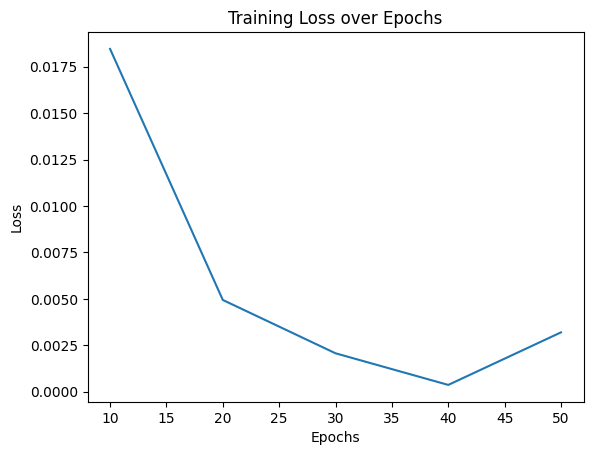

In [10]:
losses = []  # Initialize an empty list to store losses

# Training
for epoch in range(NUM_EPOCHS):
    epoch_loss = 0
    num_batches = 0
    for features, labels in train_loader:
        num_batches += 1
        #print("Shape of features:", features.shape)  # Debug line
        optimizer.zero_grad()
        outputs = model(features.float())  # Ensure float type
        loss = criterion(outputs, labels.float())  # Directly use labels without unsqueezing
        epoch_loss += loss.item()  # Accumulate loss
        loss.backward()
        optimizer.step()

        batch_loss = loss.item()
        epoch_loss += batch_loss
    
    average_epoch_loss = epoch_loss / num_batches

    # Only save and print every 10 epochs
    if (epoch + 1) % 10 == 0:
        average_epoch_loss = epoch_loss / len(train_loader)
        losses.append(average_epoch_loss)
        print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {average_epoch_loss:.4f}")

# Plotting the loss over epochs
plt.plot(range(10, NUM_EPOCHS+1, 10), losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [11]:
# Evaluation
model.eval()
all_predictions = []
all_labels = []
with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features.float())
        predicted = (torch.sigmoid(outputs).data > 0.5).float()
        #print("Shape of predicted:", predicted.shape)  # Debug line
        #print("Shape of labels:", labels.shape)  # Debug line
        if predicted.dim() == 0: #debug line
            predicted = predicted.unsqueeze(0) #debug line
        all_predictions.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

print('Accuracy: {:.2f}%'.format(100 * sum(np.array(all_predictions) == np.array(all_labels)) / len(all_labels)))

# Confusion Matrix & Classification Report
confusion = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(confusion)

report = classification_report(all_labels, all_predictions)
print("\nClassification Report:")
print(report) #95.50% is the top so far

Accuracy: 95.08%
Confusion Matrix:
[[8873  577]
 [ 354 9132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      9450
           1       0.94      0.96      0.95      9486

    accuracy                           0.95     18936
   macro avg       0.95      0.95      0.95     18936
weighted avg       0.95      0.95      0.95     18936



In [12]:
#Save Model and preprocessor

# Save Model and Preprocessor Paths
pipeline_save_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing\lstm_seq_nn_preprocessor.joblib'
model_save_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models\lstm_seq_nn_model.pth'


# Save the preprocessor
dump(preprocessor, pipeline_save_path)

# Save the LSTM model
torch.save(model.state_dict(), model_save_path)


In [13]:
# Load the Preprocessor and Model
loaded_pipeline = load(pipeline_save_path)

model = LSTM1(1, input_size, HIDDEN_SIZE, 1).float()
model.load_state_dict(torch.load(model_save_path))
model.eval()  # Set the model to evaluation mode

LSTM1(
  (lstm): LSTM(758, 512, batch_first=True)
  (fc_1): Linear(in_features=512, out_features=128, bias=True)
  (relu): ReLU()
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [14]:
#read "unseen" data so we can test what these models would predict for the 2022 playoffs
#prediction_data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\nba_test_unseen_dataset.csv')
prediction_data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\23_24_season_games_clean.csv')

print(prediction_data.head())

# Drop the columns that are not needed Matchup
prediction_data = prediction_data.drop(columns=['PTS_PER_MIN', 'PTS_DIFF', 'PTS_PER_MIN_DIFF','FG_PCT', 'FG3_PCT', 'FT_PCT', 'TS%', 'ORtg', 'PER%', 'eFG%', 'AST%', ])#, 'PLUS_MINUS'
    
included_columns = ['TEAM_ID', 'Home_Away', 'MATCHUP_ID', 'FG_PCT_DIFF', 'FG3_PCT_DIFF',
       'FT_PCT_DIFF', 'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF',
       'PER%_DIFF', 'YEAR', 'MONTH', 'DAY', 'WL_encoded', 'DRtg_Oliver_DIFF']



feature_order = [#'PTS_PER_MIN', 'PTS_DIFF', 'PTS_PER_MIN_DIFF', 'TEAM_ID_OPP', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS',  'FG_PCT_OPP', 'FG3_PCT_OPP',  'SEASON_ID', 'GAME_ID'
                   #'TS%', 'ORtg', 'PER%', 'eFG%', 'AST%', 'FT_PCT_OPP', 'PLUS_MINUS_OPP','TS%_OPP', 'eFG%_OPP', 'AST%_OPP', , 'MATCHUP'
                  'Home_Away', 'YEAR', 'MONTH', 'DAY', 'MATCHUP_ID','TEAM_ID', #'DRtg', 'DPER%',
                 'FG_PCT_DIFF','FG3_PCT_DIFF','FT_PCT_DIFF','TS%_DIFF','eFG%_DIFF','AST%_DIFF','ORtg_DIFF','PER%_DIFF', 'DRtg_Oliver_DIFF'] #, 'MATCHUP'

prediction_data = prediction_data[included_columns]
#prediction_data = prediction_data.drop(x_excluded_independent_variables, axis=1)

#does feature_names = feature_order?
print(len(included_columns))
print(len(feature_order))

# Reorder columns in the new_data DataFrame
prediction_data = prediction_data[feature_order]
print(prediction_data.head())
print(prediction_data.shape)

  Home_Away  WL_encoded     TEAM_ID  TEAM_ID_OPP  YEAR  MONTH  DAY MATCHUP_ID  \
0      Away         NaN  1610612743   1610612758  2023     12    2     DENSAC   
1      Home         NaN  1610612756   1610612763  2023     12    2     MEMPHX   
2      Home         NaN  1610612742   1610612760  2023     12    2     DALOKC   
3      Away         NaN  1610612763   1610612756  2023     12    2     MEMPHX   
4      Away         NaN  1610612760   1610612742  2023     12    2     DALOKC   

         Date    PTS   FGM   FGA  FG3M  FG3A   FTM   FTA   AST  OREB   TOV  \
0  2023-12-02  119.5  45.0  85.5  12.5  32.0  17.0  19.5  32.5   8.5  14.5   
1  2023-12-02  106.0  38.5  87.5  11.0  35.0  18.0  25.5  24.0   8.5  15.0   
2  2023-12-02  116.0  38.5  94.0  15.0  47.0  24.0  29.5  20.5  14.0  15.0   
3  2023-12-02  117.5  42.5  91.5   9.0  27.5  23.5  32.5  29.0  17.0  15.0   
4  2023-12-02  115.5  43.0  88.5   7.5  28.0  22.0  26.0  23.0   9.5  14.0   

   STL  BLK   REB    MIN  DREB  ORtg_Oliver 

In [15]:
#add in the last 5 games for each team

def get_last_n_games(team_id, n, historical_data):
    return historical_data[historical_data['TEAM_ID'] == team_id].tail(n)

# Initialize an empty DataFrame to hold the new "unseen" data with appended historical games
new_prediction_data = pd.DataFrame()

# Iterate over each unique team in the "unseen" data
for team in prediction_data['TEAM_ID'].unique():
    team_data = prediction_data[prediction_data['TEAM_ID'] == team]
    
    # Get the last n games for this team from the historical data
    last_n_games = get_last_n_games(team, seq_length, X)
    
    # Append the last n games to this team's "unseen" data
    new_team_data = pd.concat([last_n_games, team_data])
    
    # Append this team's new "unseen" data to the overall new "unseen" data
    new_prediction_data = pd.concat([new_prediction_data, new_team_data])

print(new_prediction_data.head())
print(new_prediction_data.shape)

# Now, new_prediction_data contains the "unseen" data appended with the last n historical games for each team


          TEAM_ID Home_Away MATCHUP_ID  FG_PCT_DIFF  FG3_PCT_DIFF  \
94436  1610612743      Away     DENLAC    -0.066235     -0.155000   
94658  1610612743      Away     DENLAC    -0.066235     -0.155000   
94462  1610612743      Home     DENHOU     0.041512     -0.051756   
94656  1610612743      Home     DENHOU     0.041512     -0.051756   
94654  1610612743      Away     DENPHX    -0.103714     -0.041667   

       FT_PCT_DIFF  TS%_DIFF  eFG%_DIFF  AST%_DIFF  ORtg_DIFF  PER%_DIFF  \
94436     0.287529 -0.021395  -0.085550  20.540107  -8.851070 -27.323864   
94658     0.287529 -0.021395  -0.085550  20.540107  -8.851070 -27.323864   
94462     0.005842  0.027595   0.034272  30.624516  -7.534880 -20.991907   
94656     0.005842  0.027595   0.034272  30.624516  -7.534880 -20.991907   
94654     0.340077 -0.056347  -0.118506  25.430476  -9.457521 -23.726274   

       YEAR  MONTH  DAY  WL_encoded  DRtg_Oliver_DIFF  
94436  2023     11   27         0.0         -6.581474  
94658  2023     

In [16]:
#create sequences for unseen data
def create_sequences(X, y, team_ids, seq_length):
    sequences = []
    target = []
    team_ids_seq = []
    
    for team in np.unique(team_ids):
        team_indices = np.where(team_ids == team)[0]
        X_team = X[team_indices]
        y_team = y[team_indices] if y is not None else None
        
        # Trim the oldest games so that the total number of games for this team is a multiple of seq_length
        trim_size = len(X_team) % seq_length
        if trim_size > 0:
            X_team = X_team[trim_size:]
            y_team = y_team[trim_size:] if y is not None else None
        
        for i in range(len(X_team) - seq_length + 1):
            seq = X_team[i:i + seq_length]
            sequences.append(seq)
            team_ids_seq.append(team)  # Keep track of the team ID for each sequence
            
            if y is not None:
                label = y_team[i + seq_length - 1] # Label is the result of the last game in the sequence
                target.append(label)
            
    return np.array(sequences), np.array(target) if y is not None else None, np.array(team_ids_seq)


In [17]:
# Ensure prediction_data has the right columns
assert set(feature_order).issubset(prediction_data.columns), "Some features are missing in the unseen data."


# Preprocess the entire new_prediction_data DataFrame
new_prediction_data_preprocessed = loaded_pipeline.transform(new_prediction_data)
new_prediction_data_preprocessed = new_prediction_data_preprocessed.toarray() 

# Create sequences on the preprocessed data
team_ids_new = new_prediction_data['TEAM_ID'].values  # Extract team IDs from the new data
X_raw, _, team_ids_seq = create_sequences(new_prediction_data_preprocessed, None, team_ids_new, seq_length)
X_new_tensor = torch.tensor(X_raw.astype(np.float32))




In [18]:
# Use the trained model to make predictions
logits = model(X_new_tensor)
probabilities = torch.sigmoid(logits)
predicted_labels = (probabilities > 0.5).float()

# Add predictions to a new DataFrame (since the number of rows will differ due to sequence creation)
prediction_results = pd.DataFrame(predicted_labels.detach().numpy(), columns=['PREDICTION'])

# Reset the index of prediction_data to make sure it aligns with prediction_results
prediction_data.reset_index(drop=True, inplace=True)

# Concatenate the prediction results to the original DataFrame
prediction_data_with_results = pd.concat([prediction_data, prediction_results], axis=1)

print(prediction_data_with_results.head())
print(prediction_data_with_results.shape)


  Home_Away  YEAR  MONTH  DAY MATCHUP_ID     TEAM_ID  FG_PCT_DIFF  \
0      Away  2023     12    2     DENSAC  1610612743    -0.017544   
1      Home  2023     12    2     MEMPHX  1610612756     0.024481   
2      Home  2023     12    2     DALOKC  1610612742     0.076301   
3      Away  2023     12    2     MEMPHX  1610612763    -0.024481   
4      Away  2023     12    2     DALOKC  1610612760    -0.076301   

   FG3_PCT_DIFF  FT_PCT_DIFF  TS%_DIFF  eFG%_DIFF  AST%_DIFF  ORtg_DIFF  \
0     -0.026989    -0.076340 -0.023099  -0.020468  -7.602339  -2.530480   
1      0.012987     0.017195  0.018421   0.010804   4.265418  12.457155   
2     -0.051292     0.032595  0.035689   0.038887   4.180190   3.162511   
3     -0.012987    -0.017195 -0.018421  -0.010804  -4.265418 -12.457155   
4      0.051292    -0.032595 -0.035689  -0.038887  -4.180190  -3.162511   

   PER%_DIFF  DRtg_Oliver_DIFF  PREDICTION  
0  -9.522879         -3.852008         0.0  
1  23.575157         10.901733         0.0  

In [19]:

# Convert YEAR, MONTH, DAY into a date column
prediction_data_with_results['Date'] = pd.to_datetime(prediction_data_with_results[['YEAR', 'MONTH', 'DAY']])
prediction_data_with_results = prediction_data_with_results.sort_values(by=['Date'])

# Merge with unique teams data
df1 = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\team_ids.csv')
unique_teams = df1[['TEAM_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION']].drop_duplicates()
prediction_data_with_results = prediction_data_with_results.merge(unique_teams, on='TEAM_ID', how='left')

# Drop unnecessary columns
columns_to_drop = ["TEAM_ID", "YEAR", "MONTH", "DAY"]
prediction_data_with_results = prediction_data_with_results.drop(columns=columns_to_drop)

# filter for todays games
today = pd.Timestamp.today().normalize()
prediction_data_with_results = prediction_data_with_results[prediction_data_with_results['Date'] == today]

# Display summarized results
season_pred = prediction_data_with_results  # Assuming you want all columns. Adjust accordingly.
print(season_pred.head())

# Save the predictions
#season_pred.to_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\ltsm_seq_season_pred.csv', index=False)
print(season_pred.shape)

  Home_Away MATCHUP_ID  FG_PCT_DIFF  FG3_PCT_DIFF  FT_PCT_DIFF  TS%_DIFF  \
0      Away     DENSAC    -0.017544     -0.026989    -0.076340 -0.023099   
1      Home     DENSAC     0.017544      0.026989     0.076340  0.023099   
2      Away     HOULAL     0.048462     -0.003030     0.115207  0.077113   
3      Home     HOULAL    -0.048462      0.003030    -0.115207 -0.077113   
4      Away     GSWLAC    -0.044388      0.014286     0.119048 -0.026908   

   eFG%_DIFF  AST%_DIFF  ORtg_DIFF  PER%_DIFF  DRtg_Oliver_DIFF  PREDICTION  \
0  -0.020468  -7.602339  -2.530480  -9.522879         -3.852008         0.0   
1   0.020468   7.602339   2.530480   9.522879          3.852008         0.0   
2   0.059396  -2.725275  14.698281   1.770947         14.027659         1.0   
3  -0.059396   2.725275 -14.698281  -1.770947        -14.027659         0.0   
4  -0.050190   0.762100  10.754188  22.230843         10.107266         1.0   

        Date              TEAM_NAME TEAM_ABBREVIATION  
0 2023-12-02

In [20]:
from datetime import datetime
import pandas as pd
import os

# 1. Create a DataFrame for today's outcomes based on prediction_data
today_predictions = prediction_data_with_results.copy()

# 2. Add today's date and recording timestamp
today_predictions['date_prediction_recorded'] = pd.Timestamp.today()
today_predictions.rename(columns={'PREDICTION': 'ltsm_seq_PREDICTION'}, inplace=True)
print(today_predictions.columns)

#filter for ATLCHA matchup_id
#today_predictions = today_predictions[today_predictions['MATCHUP_ID'] == 'ATLCHA']

# Define the path to the saved predictions
saved_predictions_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\ltsm_seq_season_pred.csv'

# 3. Check if the saved predictions file exists
if not os.path.exists(saved_predictions_path):
    # If it doesn't exist, create it from today's predictions
    today_predictions.to_csv(saved_predictions_path, index=False)
    print(today_predictions.shape)
else:
    # If it exists, load it and update
    saved_predictions = pd.read_csv(saved_predictions_path)
    # Normalize the 'Date' column to remove time portion
    saved_predictions['Date'] = pd.to_datetime(saved_predictions['Date']).dt.normalize()

    print(saved_predictions.shape)

    print(today_predictions.shape)
    # 4. Concatenate existing and new predictions
    all_predictions = pd.concat([saved_predictions, today_predictions], ignore_index=True)
    
    # 5. Sort by date recorded, matchup id, and home_away
    all_predictions.sort_values(by=['date_prediction_recorded', 'MATCHUP_ID', 'Home_Away'], ascending=[True, True, True], inplace=True)
    
    # 6. Remove duplicates, keeping only the newest entry and not deleting previous days predictions
    all_predictions.drop_duplicates(subset=['MATCHUP_ID', 'TEAM_NAME', 'Date'], keep='first', inplace=True)
    
    # Sort by date and reset index
    all_predictions = all_predictions.sort_values(by=['Date']).reset_index(drop=True)
    
    # 7. Save the updated DataFrame back to CSV
    all_predictions.to_csv(saved_predictions_path, index=False)

# 8. Display the results
#print(all_predictions.head())
print(all_predictions.shape)
print(all_predictions.columns)

Index(['Home_Away', 'MATCHUP_ID', 'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF',
       'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF',
       'DRtg_Oliver_DIFF', 'ltsm_seq_PREDICTION', 'Date', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'date_prediction_recorded'],
      dtype='object')
(404, 17)
(24, 16)
(428, 17)
Index(['Date', 'MATCHUP_ID', 'TEAM_NAME', 'ltsm_seq_PREDICTION', 'Home_Away',
       'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF', 'TS%_DIFF', 'eFG%_DIFF',
       'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF', 'DRtg_Oliver_DIFF', 'PREDICTION',
       'TEAM_ABBREVIATION', 'date_prediction_recorded'],
      dtype='object')


In [21]:
#print just predictions and matchup_id
#print(all_predictions[['MATCHUP_ID', 'TEAM_NAME', 'PREDICTION']])

#filter all_predictions for just today
today = pd.Timestamp.today().normalize()
all_predictions = all_predictions[all_predictions['Date'] == today]

# sum prediction column by matchup_id
all_predictions['prediction_sum'] = all_predictions.groupby('MATCHUP_ID')['ltsm_seq_PREDICTION'].transform('sum')
#filter non 1's in count
#all_predictions = all_predictions[all_predictions['prediction_sum'] != 1]
print(all_predictions[['MATCHUP_ID', 'TEAM_NAME', 'ltsm_seq_PREDICTION', 'prediction_sum']])


    MATCHUP_ID               TEAM_NAME  ltsm_seq_PREDICTION  prediction_sum
404     CLEDET         Detroit Pistons                  1.0             1.0
405     CLEDET     Cleveland Cavaliers                  0.0             1.0
406     CHINOP           Chicago Bulls                  1.0             1.0
407     CHINOP    New Orleans Pelicans                  0.0             1.0
408     ATLMIL         Milwaukee Bucks                  0.0             0.0
409     CHAMIN  Minnesota Timberwolves                  1.0             1.0
410     BKNORL           Brooklyn Nets                  1.0             2.0
411     BKNORL           Orlando Magic                  1.0             2.0
412     DALOKC   Oklahoma City Thunder                  1.0             1.0
413     CHAMIN       Charlotte Hornets                  0.0             1.0
414     DALOKC        Dallas Mavericks                  0.0             1.0
415     HOULAL         Houston Rockets                  1.0             1.0
416     DENS